In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df=df.drop('CustomerID', axis=1)

In [8]:
X= df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


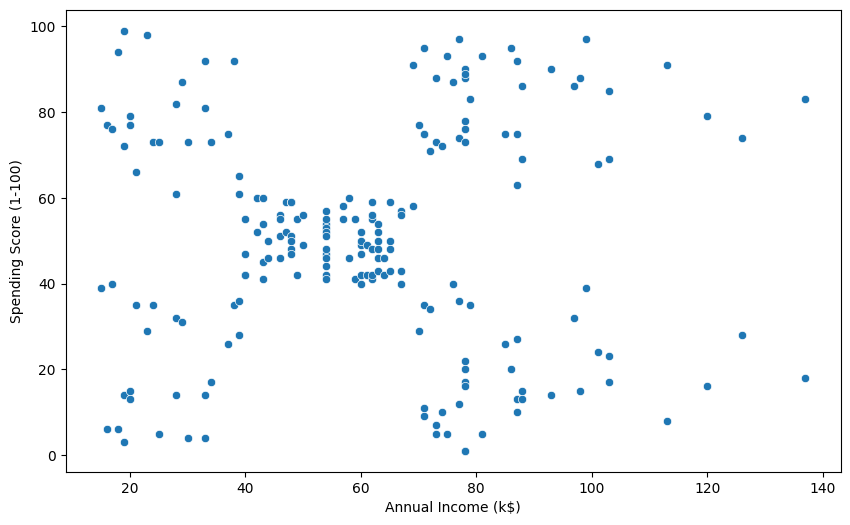

In [10]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(X, x= "Annual Income (k$)", y= "Spending Score (1-100)")
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
print(wcss)

[23.04072032603991, 13.993505283127973, 9.058985215159453, 6.110312266413656, 3.5831179059525606, 3.098385141882586, 2.624103948396722, 2.218057312083072, 1.873434667867071, 1.6557947221391265]


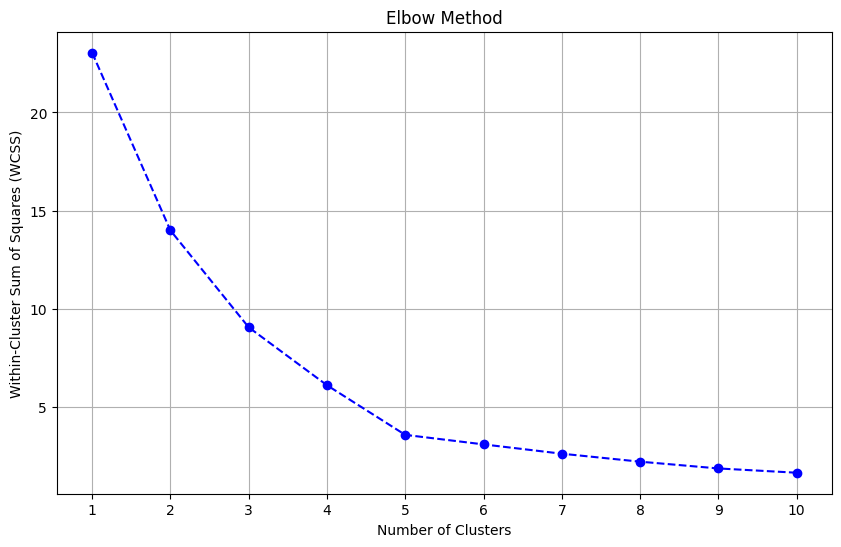

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--',color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

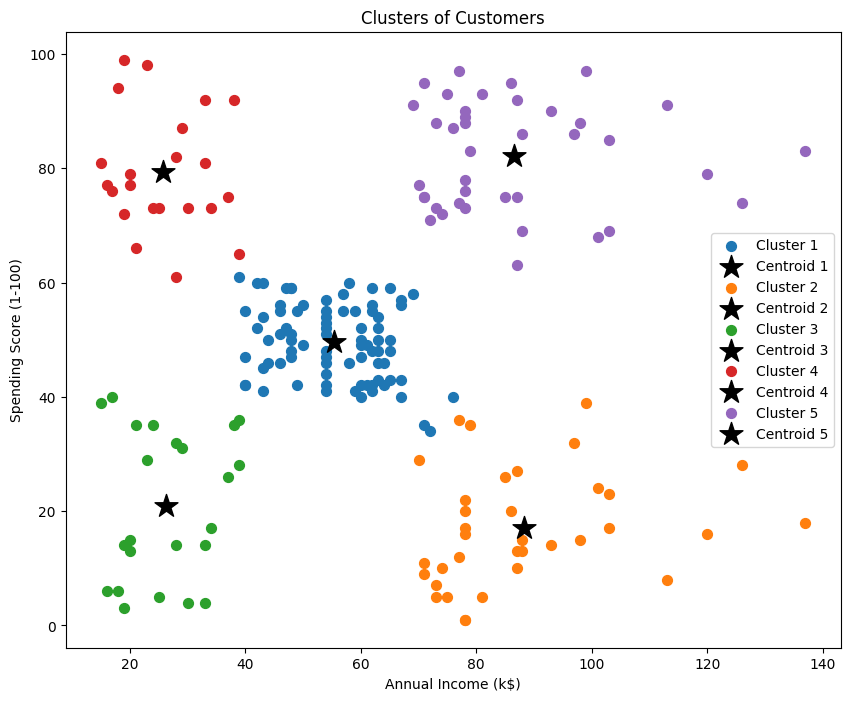

In [15]:
plt.figure(figsize=(10,8))
for cluster_label in range(5):
  cluster_points = X[kmeans.labels_ == cluster_label]
  centroid = cluster_points.mean(axis=0)
  plt.scatter(cluster_points['Annual Income (k$)'],cluster_points['Spending Score (1-100)'],
                  s=50, label=f'Cluster {cluster_label + 1}')
  plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='*', label=f'Centroid {cluster_label + 1}')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()